# Analyse exploratoire des données

# Analyse exploratoire des données

Cet ensemble de données contient six millions d'évaluations pour dix mille livres les plus populaires (avec la plupart des évaluations). Il y a aussi :

* livres marqués à lire par les utilisateurs
* métadonnées du livre (auteur, année, etc.)
* tags/bibliothèques/genres

-- par Brahiman, Marie et Yanice

## Import des librairies nécessaires au traitement des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

## Chargement des données

In [3]:
ratings = pd.read_csv("ratings.csv")
books = pd.read_csv("books.csv")
tags = pd.read_csv("tags.csv")
book_tags = pd.read_csv("book_tags.csv")
to_read = pd.read_csv("to_read.csv")

Vu des données

In [4]:
ratings.head(3)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5


Aucun utilisateur n'a noté un même livre plus d'une fois

In [5]:
(ratings.groupby(["user_id", "book_id"]).count() == 1).sum()

rating    5976479
dtype: int64

In [6]:
books.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [7]:
tags

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [8]:
book_tags.head(3)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173


In [9]:
to_read.head(3)

,user_id,book_id
0,9,8
1,15,398
2,15,275


## Création d'un seul et même dataframe
Faisons des jointures entre les tables pour obtenir un seul et même dataframe

In [10]:
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


Dans le fichier readme du github, ils semblent dire que book_id de ratings et to_read map à work_id de books. Or, si on regarde la distribution de book_id dans ratings elle semble correspondre qu'à book_id de books. Ainsi on fera la jointure entre ces deux colonnes.

In [11]:
ratings["book_id"].describe()

count    5.976479e+06
mean     2.006477e+03
std      2.468499e+03
min      1.000000e+00
25%      1.980000e+02
50%      8.850000e+02
75%      2.973000e+03
max      1.000000e+04
Name: book_id, dtype: float64

In [12]:
to_read["book_id"].describe()

count    912705.000000
mean       2454.739538
std        2626.359921
min           1.000000
25%         360.000000
50%        1381.000000
75%        3843.000000
max       10000.000000
Name: book_id, dtype: float64

In [13]:
books[["book_id", "work_id", "goodreads_book_id"]].describe()

,book_id,work_id,goodreads_book_id
count,10000.00000,1.000000e+04,1.000000e+04
mean,5000.50000,8.646183e+06,5.264697e+06
std,2886.89568,1.175106e+07,7.575462e+06
min,1.00000,8.700000e+01,1.000000e+00
25%,2500.75000,1.008841e+06,4.627575e+04
50%,5000.50000,2.719524e+06,3.949655e+05
75%,7500.25000,1.451775e+07,9.382225e+06
max,10000.00000,5.639960e+07,3.328864e+07


### Jointure entre ratings et books

In [14]:
data = ratings.merge(books, how="inner", left_on=["book_id"], right_on=["book_id"])

In [15]:
data

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976474,36773,9548,5,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,15460,15482,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...
5976475,50673,9548,4,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,15460,15482,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...
5976476,45213,9548,3,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,15460,15482,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...
5976477,12872,9548,4,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,15460,15482,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...


### Jointure entre to_read et books
On crée un champs to_read à la table to_read afin de l'insérer dans la table de jointure

In [16]:
to_read["to_read"] = 1
to_read

,user_id,book_id,to_read
0,9,8,1
1,15,398,1
2,15,275,1
3,37,7173,1
4,34,380,1
...,...,...,...
912700,39374,1049,1
912701,10492,5180,1
912702,21879,4827,1
912703,21879,6642,1


In [17]:
data = data.merge(to_read, how="left", left_on=["user_id", "book_id"], right_on=["user_id", "book_id"])
data

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,to_read
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976474,36773,9548,5,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,15482,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN
5976475,50673,9548,4,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,15482,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN
5976476,45213,9548,3,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,15482,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN
5976477,12872,9548,4,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,15482,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN


Seulement 2200 livres ont été noté après qu'un utilisateur l'a mis dans leur liste "to_read".

In [18]:
len(data) - data["to_read"].isna().sum()

2200

### Jointure entre la table tags et book_tags

Il y a tags qui sont en double. On va donc supprimer les doublons.

In [21]:
(book_tags.groupby(["goodreads_book_id", "tag_id"]).count() > 1).sum()

count    8
dtype: int64

In [22]:
book_tags.drop_duplicates(inplace=True)

In [19]:
books_tags = book_tags.merge(tags, how="inner", left_on="tag_id", right_on="tag_id")
books_tags

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read
...,...,...,...,...
999907,31538635,14690,6,hogwarts
999908,32848471,16149,21,jan-2017
999909,33288638,27821,9,single-mom
999910,33288638,11478,7,fave-author


On peut voir que les tags sont définis par les utilisateurs. De plus, GoodReads ne semble pas déterminer par lui-même le genre d'un livre mais se fie aux tags des utilisateurs. Pour obtenir le genre d'un livre, on va donc nous aussi filtrer les tags des utilisateurs.

In [20]:
books_tags["tag_name"].value_counts()[:20]

to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64

On crée la fonction de filtrage des tags

In [21]:
def filter_tags(row: str):
    exclude_tags = ["to-read", "favorites", "owned", "books-i-own", "currently-reading", "library", "owned-books", "to-buy", "kindle", "default", "ebook", "my-books", "audiobook", "ebooks", "wish-list", "my-library", "audiobooks", "i-own", "favourites", "audio", "own-it", "e-book", "books", "audible", "audio-books", "abandoned", "re-read", "have", "audio-book", "borrowed", "english", "did-not-finish", "favorite", "maybe", "shelfari-favorites", "ya", "all-time-favorites", "favorite-books", "dnf", "finished", "paperback", "reviewed", "unfinished", "home-library", "library-books", "calibre", "didn-t-finish", "to-read-fiction", "nook", "library-book", "favorite-authors", "want-to-read", "tbr", "unread", "recommended", "bookshelf", "books-i-have", "own-to-read", "kindle-books", "must-read", "need-to-buy", "read-in-english", "reread", "on-my-shelf", "ya-books", "my-favorites", "listened-to", "on-hold", "favorite-series", "on-kindle", "to-read-non-fiction", "shelfari-wishlist", "ya-fantasy", "book-club-books", "personal-library", "my-bookshelf", "book-group", "other", "faves", "couldn-t-finish", "gave-up-on", "mine", "childhood-favorites", "want", "ya-lit", "to-be-read", "to-read-nonfiction", "hardcover", "read-for-school", "favourite", "non-fiction-to-read", "favs", "never-finished", "in-my-library", "childhood-reads", "collection", "books-to-buy", "to-get", "on-my-bookshelf", "book-club-reads", "book-boyfriends", "read-more-than-once", "bought", "to-read-own", "loved", "owned-to-read", "fiction-to-read", "gave-up", "want-to-buy", "to-read-classics", "purchased", "books-owned", "read-aloud", "ya-romance", "scanned", "netgalley", "my-ebooks", "meh", "i-own-it", "on-my-kindle", "home", "signed", "book-boyfriend", "my-childhood", "to-reread", "to-read-fantasy", "read-as-a-kid", "chapter-books", "already-read", "favorite-author", "to-read-owned", "ya-paranormal", "not-read", "read-alouds", "stopped-reading", "summer-reading", "sub", "book", "my-collection", "series-to-read", "could-not-finish", "loved-it", "ya-contemporary", "not-interested", "partially-read", "read-as-a-child", "listened", "want-to-own", "beach-reads", "childhood-favourites", "done", "re-reads", "read-fiction", "books-from-my-childhood", "tbr-pile", "next", "series-to-finish", "have-read", "fantasy-read", "read-fantasy", "read-again", "and", "summer-reads", "in-english", "paper", "fae", "fantasy-to-read", "work", "need", "buy", "ibooks", "own-kindle", "self", "new", "pdf", "biblioteca", "in-translation", "amazon", "all-time-favourites", "own-a-copy", "hardback", "epub", "not-finished", "collections", "to-purchase", "donated", "paused", "a", "recommendations", "completed", "translations", "unfinished-series", "dropped"]
    exclude_regexp = [re.compile(r"(?:books-)*read(?:-in)*-[0-9]+"), re.compile(r"^[0-9]+"), re.compile(r"(?:challenge|rory|read|favorite|shelf|book|own|childhood|gilmore|favo[u]*rite|kindle|buy|finish)")]
    return exclude_tags.count(row) == 0 | sum(map(lambda reg: reg.search(row) != None, exclude_regexp)) == 0

On crée un mask afin de ne garder que les tags qui sont le plus présent (dans au moins n livres)

In [22]:
mask_tags = books_tags["tag_name"].value_counts()

Puis on masque selon le filtrage et le mask

In [23]:
books_tags = books_tags[books_tags["tag_name"].isin(mask_tags.index[mask_tags > 100]) & books_tags["tag_name"].apply(filter_tags)].reset_index(drop=True).copy()

In [24]:
books_tags

,goodreads_book_id,tag_id,count,tag_name
0,1,11305,37174,fantasy
1,2,11305,3441,fantasy
2,3,11305,47478,fantasy
3,5,11305,39330,fantasy
4,6,11305,38378,fantasy
...,...,...,...,...
354361,29104680,21391,10,new-adult-romance
354362,29519514,21391,14,new-adult-romance
354363,29519517,21391,11,new-adult-romance
354364,29610595,21391,8,new-adult-romance


On transforme le dataframe afin de joindre tous les tags d'un même livre dans une seule ligne séparé par des espaces (préparation pour le tfidf)

In [25]:
books_tags["tags"] = books_tags.groupby("goodreads_book_id")["tag_name"].transform(' '.join)
books_tags.drop(["tag_id", "tag_name", "count"], axis=1, inplace=True)
books_tags.drop_duplicates(inplace=True)
books_tags

,goodreads_book_id,tags
0,1,fantasy young-adult fiction series magic child...
1,2,fantasy young-adult fiction magic children chi...
2,3,fantasy young-adult fiction series magic child...
3,5,fantasy young-adult fiction series magic child...
4,6,fantasy young-adult fiction series childrens a...
...,...,...
151467,12675109,nonfiction non-fiction education life self-hel...
151542,15824358,nonfiction non-fiction reference educational e...
151599,18176747,nonfiction non-fiction biography autobiography...
151607,18607805,nonfiction non-fiction reference misc self-hel...


### Jointure entre books_tags et books
Puis on merge le dataframe des tags avec celui des livres

In [26]:
data = data.merge(books_tags, how="left", left_on="goodreads_book_id", right_on="goodreads_book_id")
data

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,to_read,tags
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,fantasy fiction series adventure classics nove...
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,fantasy fiction series adventure classics nove...
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,fantasy fiction series adventure classics nove...
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,fantasy fiction series adventure classics nove...
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,NaN,fantasy fiction series adventure classics nove...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976474,36773,9548,5,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN,young-adult fiction series romance contemporar...
5976475,50673,9548,4,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN,young-adult fiction series romance contemporar...
5976476,45213,9548,3,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN,young-adult fiction series romance contemporar...
5976477,12872,9548,4,30839185,30839185,51437887,4,NaN,NaN,L.J. Shen,...,2179,241,504,1952,5193,7592,https://images.gr-assets.com/books/1481945407m...,https://images.gr-assets.com/books/1481945407s...,NaN,young-adult fiction series romance contemporar...


On vérifie que tous les livres ont au moins un tag

In [27]:
(data["tags"] == '').sum() + data["tags"].isna().sum()

0

## Création de la rating sparse matrice

Faisons un pivot table des users

In [28]:
ratings_mt = data.pivot("user_id", "book_id", "rating")
ratings_mt

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,4.0,4.0,NaN,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53420,4.0,5.0,3.0,NaN,2.0,NaN,NaN,NaN,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,4.0,5.0,NaN,5.0,4.0,NaN,4.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53422,4.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Vérification des valeurs manquantes et du type des données

In [29]:
data.dtypes

user_id                        int64
book_id                        int64
rating                         int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
to_read                      float64
tags                          object
d

Transformation de certaines colonnes pour remplacer les na par des valeurs par défaut

In [30]:
data['original_publication_year'].value_counts()

2012.0    271870
2011.0    261647
2005.0    233458
2009.0    226194
2008.0    218387
           ...  
1785.0       119
1677.0        97
1554.0        89
1380.0        75
1825.0        67
Name: original_publication_year, Length: 293, dtype: int64

In [31]:
data['to_read'].fillna(0, inplace=True)
data['isbn13'].fillna('', inplace=True)
data['isbn'].fillna('', inplace=True)

In [32]:
data.isna().sum()

user_id                           0
book_id                           0
rating                            0
goodreads_book_id                 0
best_book_id                      0
work_id                           0
books_count                       0
isbn                              0
isbn13                            0
authors                           0
original_publication_year      5942
original_title               160910
title                             0
language_code                337020
average_rating                    0
ratings_count                     0
work_ratings_count                0
work_text_reviews_count           0
ratings_1                         0
ratings_2                         0
ratings_3                         0
ratings_4                         0
ratings_5                         0
image_url                         0
small_image_url                   0
to_read                           0
tags                              0
dtype: int64

On peut voir que le language semble majoritairement anglais. Il est peut être inutile de s'intéresser aux autres langues

In [33]:
data["language_code"].value_counts()

eng      4239947
en-US    1179179
en-GB     111743
en-CA      47106
spa        25033
fre        10815
ara        10543
ger         3837
ind         2649
jpn         1190
en          1171
por         1043
nl          1017
nor          963
pol          961
per          700
dan          479
ita          307
mul          195
vie          179
swe          129
fil           75
tur           67
rus           67
rum           64
Name: language_code, dtype: int64

Traitement de la colonne year

In [34]:
data['original_publication_year'] = data['original_publication_year'].astype("Int64")

0          2001
1          2001
2          2001
3          2001
4          2001
           ... 
5976474    2016
5976475    2016
5976476    2016
5976477    2016
5976478    2016
Name: original_publication_year, Length: 5976479, dtype: Int64

## Analyse des distributions

On peut voir que les utilisateurs ont tendance à donner des notes positives, entre 3 et 5 (92% des notes).

<AxesSubplot:>

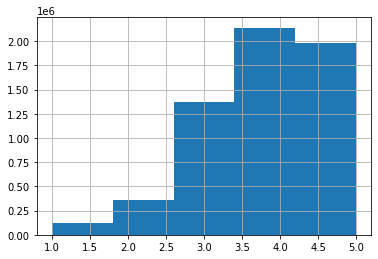

In [120]:
data['rating'].hist(bins=5)


In [121]:
data['rating'].value_counts(normalize=True)[3] + data['rating'].value_counts(normalize=True)[4] + data['rating'].value_counts(normalize=True)[5]

0.9191075547994061

([<matplotlib.axis.XTick at 0x260be659c40>,
 [Text(0, 0, 'ratings_1'),
  Text(1, 0, 'ratings_2'),
  Text(2, 0, 'ratings_3'),
  Text(3, 0, 'ratings_4'),
  Text(4, 0, 'ratings_5')])

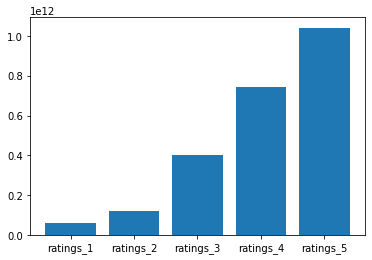

In [122]:
d = data[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum().to_dict()
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))

Les votes semblent plus critiques du côté utilisateur que du côté goodreads

On peut voir que dans les données, chaque utilisateur a voté une seule fois pour un livre.

In [123]:
len(data) - len(data[["user_id", "book_id"]].drop_duplicates())

0

Aucun utilisateur a noté moins d'une dizaine de livres.

In [124]:
(data.groupby("user_id")["book_id"].count() < 10).sum()

0

On voit que chaque utilisateur notent en moyenne aux alentours de 4.

<AxesSubplot:>

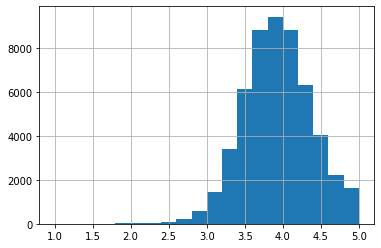

In [125]:
data.groupby("user_id")["rating"].mean().hist(bins=20)

74% des utilisateurs notent en moyenne entre 3.5 et 4.5

In [126]:
print("ecart-type :", data.groupby("user_id")["rating"].mean().std())
data.groupby("user_id")["rating"].mean()[(data.groupby("user_id")["rating"].mean() <= 4.5) & (data.groupby("user_id")["rating"].mean() >= 3.5)].shape[0]/data.groupby("user_id")["rating"].mean().shape[0] * 100

ecart-type : 0.44954283403965745


73.68411200958371

Les utilisateurs font environ 100 votes.

<AxesSubplot:>

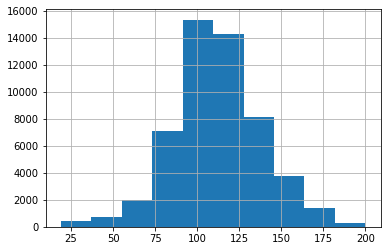

In [127]:
data.groupby("user_id")["rating"].count().hist()

On essaie de voir, en sélectionnant les livres par leur titre original si on arrive à capter seulement les versions dans d'autres langues

In [128]:
i18n_titles = list(books["original_title"].value_counts().index[books["original_title"].value_counts() > 1])
i18n_titles.remove(' ')

In [129]:
books[books["original_title"].isin(i18n_titles)][["title", "original_title", "language_code"]].sort_values("original_title")[:30]

,title,original_title,language_code
109,"A Clash of Kings (A Song of Ice and Fire, #2)",A Clash of Kings,eng
3774,A Game of Thrones / A Clash of Kings (A Song o...,A Clash of Kings,NaN
2780,A Grief Observed,A Grief Observed,en-US
361,The Screwtape Letters,A Grief Observed,eng
9334,Abandon,Abandon,en-US
5261,"Abandon (Abandon, #1)",Abandon,eng
3700,"After (After, #1)",After,eng
6673,After,After,eng
6104,Arcadia,Arcadia,eng
6480,Arcadia,Arcadia,en-US


Les livres sont en majortité en langue anglaise et très peu de livres sont présents dans d'autres langues. Par ailleurs plusieurs livres ont un même titre original mais un titre différent (possiblement un livre de la même série). Il est donc confirmé qu'il y a intérêt à travailler seulement sur les livres anglais.

<AxesSubplot:xlabel='language_code', ylabel='Count'>

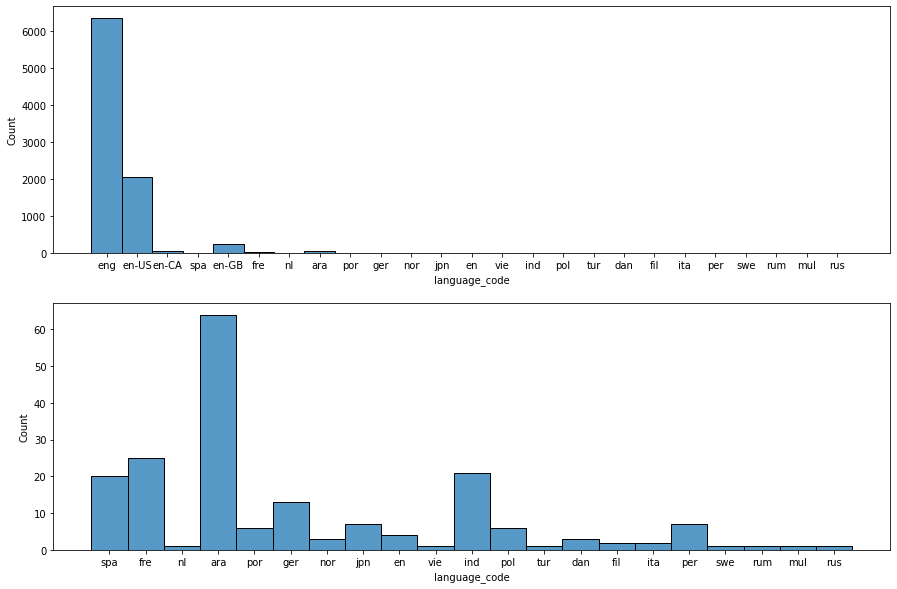

In [130]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sn.histplot(books, x="language_code")
plt.subplot(2, 1, 2)
sn.histplot(books[~books["language_code"].isin(["en-US", "en-GB", "eng", "en-CA", ""])], x="language_code")

Voici ici le top 10 des films les mieux notés

In [131]:
from IPython.core.display import display, HTML
top_ten = pd.concat([data.groupby("book_id")[["title", "image_url"]].first(), data.groupby("book_id")["rating"].mean()], axis=1).sort_values("rating", ascending=False)
display(HTML(pd.DataFrame(pd.concat([top_ten['title'][:10], top_ten['image_url'].map(lambda x: '<img src="'+x+'" />')[:10]], axis=1)).to_html(escape=False)))

,title,image_url
book_id,,
3628,The Complete Calvin and Hobbes,
7947,ESV Study Bible,
9566,Attack of the Deranged Mutant Killer Monster Snow Goons,
6920,The Indispensable Calvin and Hobbes,
8978,The Revenge of the Baby-Sat,
6361,There's Treasure Everywhere: A Calvin and Hobbes Collection,
6590,The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,
4483,It's a Magical World: A Calvin and Hobbes Collection,
3275,"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",


Voici le top 10 des films les plus populaires, on peut voir des résultats qui semblent probant, on peut donc être confiant sur la manière dont on a mergé nos dataframes.

In [132]:
top_ten_pop = data.groupby("book_id")[["title", "image_url", "ratings_count"]].first().sort_values("ratings_count", ascending=False)
display(HTML(pd.DataFrame(pd.concat([top_ten_pop['title'][:10], top_ten_pop['image_url'].map(lambda x: '<img src="'+x+'" />')[:10]], axis=1)).to_html(escape=False)))

,title,image_url
book_id,,
1,"The Hunger Games (The Hunger Games, #1)",
2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
3,"Twilight (Twilight, #1)",
4,To Kill a Mockingbird,
5,The Great Gatsby,
6,The Fault in Our Stars,
7,The Hobbit,
8,The Catcher in the Rye,
10,Pride and Prejudice,


On peut voir que les livres les plus populaires, ne sont pas forcément ceux les mieux notés. On peut ainsi se demander s'il existe un possible lien de corrélation entre la note d'un livre et ses variables.

<AxesSubplot:>

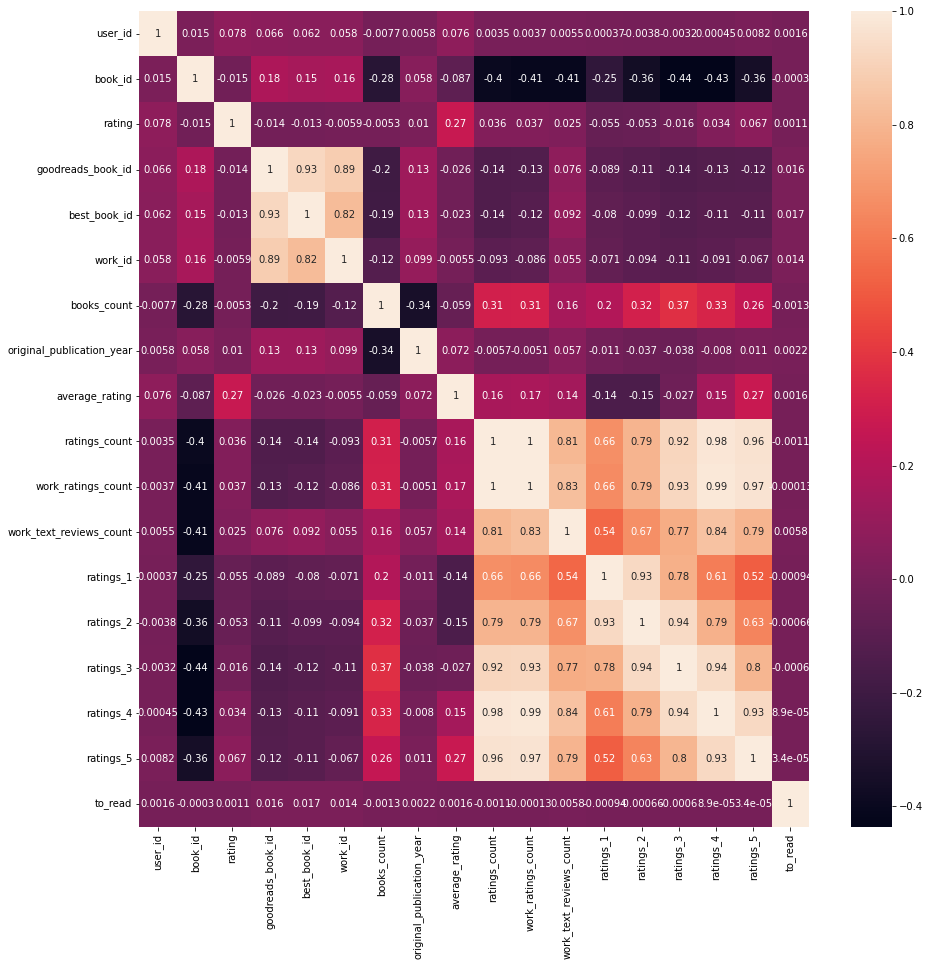

In [133]:
plt.figure(figsize=(15,15))
sn.heatmap(data.corr(), annot=True)

Méthode spearman association entre les variables

In [63]:
data.corr(method='spearman').style.format("{:.2}")

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,to_read
user_id,1.0,0.014,0.087,0.073,0.072,0.054,-0.031,0.048,0.075,-0.0064,-0.0062,-0.015,-0.018,-0.026,-0.023,-0.012,0.011,0.0016
book_id,0.014,1.0,-0.034,0.35,0.32,0.0064,-0.72,0.2,-0.11,-0.99,-1.0,-0.87,-0.92,-0.94,-0.97,-0.99,-0.98,-0.00026
rating,0.087,-0.034,1.0,-0.0089,-0.0082,-0.008,-0.0049,-0.023,0.26,0.038,0.037,0.014,-0.028,-0.042,-0.017,0.031,0.081,0.00099
goodreads_book_id,0.073,0.35,-0.0089,1.0,0.96,0.54,-0.47,0.7,0.036,-0.34,-0.33,-0.079,-0.3,-0.33,-0.35,-0.33,-0.31,0.011
best_book_id,0.072,0.32,-0.0082,0.96,1.0,0.52,-0.44,0.68,0.037,-0.32,-0.3,-0.057,-0.27,-0.3,-0.32,-0.3,-0.28,0.012
work_id,0.054,0.0064,-0.008,0.54,0.52,1.0,-0.1,0.58,0.012,-0.0046,0.015,0.24,0.026,0.013,-0.0027,0.02,0.0093,0.011
books_count,-0.031,-0.72,-0.0049,-0.47,-0.44,-0.1,1.0,-0.51,-0.054,0.71,0.72,0.58,0.67,0.72,0.74,0.72,0.67,-0.001
original_publication_year,0.048,0.2,-0.023,0.7,0.68,0.58,-0.51,1.0,0.011,-0.2,-0.19,0.12,-0.17,-0.19,-0.21,-0.18,-0.19,0.012
average_rating,0.075,-0.11,0.26,0.036,0.037,0.012,-0.054,0.011,1.0,0.12,0.12,0.054,-0.13,-0.17,-0.076,0.097,0.28,0.0016
ratings_count,-0.0064,-0.99,0.038,-0.34,-0.32,-0.0046,0.71,-0.2,0.12,1.0,1.0,0.87,0.92,0.94,0.97,0.99,0.98,-0.00058


Aucunes données semblent être corrélés à ratings, ce qui laisse penser que la note d'un livre dépend d'autres facteurs non appréciable ici.

On peut voir sur le graph suivant que les personnes qui votent souvent semblent être plus critique et donnent des notes moins élevés que les personnes qui votent moins.

<AxesSubplot:xlabel='mean_rating', ylabel='n_rating'>

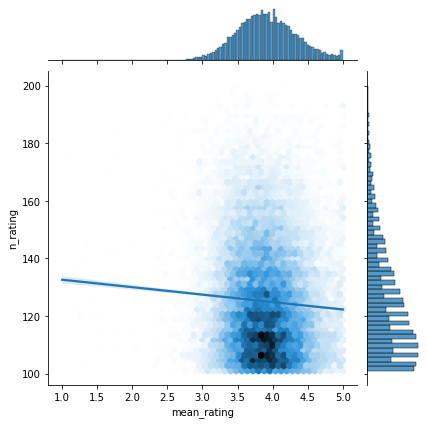

In [134]:
user_rating = pd.DataFrame({'mean_rating': data.groupby("user_id")["rating"].mean(), 'n_rating': data.groupby("user_id")["rating"].count()})
g = sn.jointplot(data=user_rating[user_rating["n_rating"] > 100], x="mean_rating", y="n_rating",  kind="hex", joint_kws=dict(bins=5000))
sn.regplot(data=user_rating[user_rating["n_rating"] > 100], x="mean_rating", y="n_rating", ax=g.ax_joint, scatter=False)

Un livre peut avoir un ou plusieurs auteurs, on peut voir sur le graphique suivant que plus un livre a d'auteurs, mieux est sa note.

<AxesSubplot:xlabel='n_authors', ylabel='rating'>

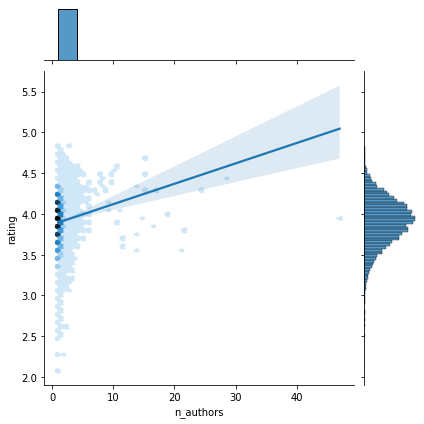

In [41]:
authors_rating = pd.DataFrame(dict(rating=data.groupby("book_id")["rating"].mean(), authors=data.groupby("book_id")["authors"].first(), n_authors=data.groupby("book_id")["authors"].first().str.split(",").str.len()))
g = sn.jointplot(data=authors_rating, x="n_authors", y="rating",  kind="hex", joint_kws=dict(bins=10))
sn.regplot(data=authors_rating, x="n_authors", y="rating", ax=g.ax_joint, scatter=False)

On peut voir que les livres avec de nombreux auteurs sont soit des anthologies, soit des livres scientifiques. Il semble donc normal qu'elles possèdent de meilleurs notes.

In [61]:
print(authors_rating.sort_values("n_authors", ascending=False)["authors"].iloc[0])
data[data["book_id"] == authors_rating.sort_values("n_authors", ascending=False).index[0]]["title"].iloc[0]

Christopher Hitchens, Titus Lucretius Carus, Omar Khayyám, Thomas Hobbes, Baruch Spinoza, David Hume, James Boswell, Percy Bysshe Shelley, George Eliot, Charles Darwin, Leslie Stephen, Anatole France, Mark Twain, Joseph Conrad, Thomas Hardy, Emma Goldman, H.P. Lovecraft, Carl Van Doren, H.L. Mencken, Sigmund Freud, Albert Einstein, George Orwell, John Betjeman, Chapman Cohen, Bertrand Russell, Philip Larkin, Martin Gardner, Carl Sagan, John Updike, John Leslie Mackie, Michael Shermer, A.J. Ayer, Daniel C. Dennett, Charles Templeton, Richard Dawkins, Victor J. Stenger, Elizabeth S.  Anderson, Penn Jillette, Ian McEwan, Steven Weinberg, Salman Rushdie, Ibn Warraq, Sam Harris, A.C. Grayling, Ayaan Hirsi Ali, John Stuart Mill, Karl Marx


'The Portable Atheist: Essential Readings for the Nonbeliever'

On peut visualiser ici les tags les plus présents pour chaque livre

(-0.5, 1199.5, 668.5, -0.5)

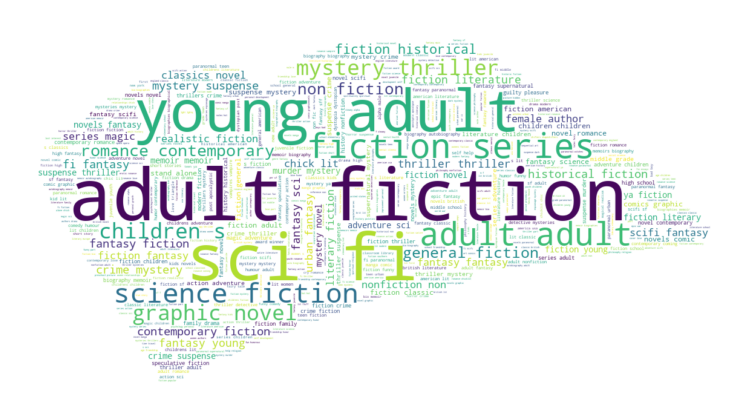

In [137]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
mask=np.array(Image.open('img/book.jpg'))
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask,stopwords=STOPWORDS).generate(str(data["tags"].drop_duplicates().str.cat(sep=" ")))
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

In [70]:
data.to_csv('donnees.csv')